In [2]:
import pandas as pd   #create data frame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

print("All libraries are working!")

All libraries are working!


In [101]:
	#1.	Which are the top 10 products by total sales?
	#2.	Which products generate the highest operating profit?
	#3.	How are sales distributed across regions, and which region leads?
	#4.	Which states achieve the highest sales?
	#5.	How do monthly sales trends look across the year?
	#6.	What is the relationship between price per unit and units sold?
	#7.	Which cities generate the highest sales?
	#8.	What percentage of sales comes from each sales method?
	#9.Which products have the highest profit margin (Operating Profit ÷ Total Sales)?

In [3]:
df = pd.read_csv("data_sales.csv")
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9641 entries, 0 to 9640
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9641 non-null   object
 1   Retailer ID       9641 non-null   int64 
 2   Invoice Date      9641 non-null   object
 3   Region            9641 non-null   object
 4   State             9641 non-null   object
 5   City              9641 non-null   object
 6   Product           9641 non-null   object
 7   Price per Unit    9639 non-null   object
 8   Units Sold        9641 non-null   object
 9   Total Sales       9641 non-null   object
 10  Operating Profit  9641 non-null   object
 11  Sales Method      9641 non-null   object
dtypes: int64(1), object(11)
memory usage: 904.0+ KB


In [5]:
df.sample(10, random_state=42)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
6539,Walmart,1185732,5/3/2020,Northeast,New York,New York,Men's Street Footwear,$65.00,"1,200","78,000","$39,000",Outlet
668,Foot Locker,1128299,6/24/2021,Southeast,Virginia,Richmond,Men's Street Footwear,$53.00,233,"1,235",$580,Online
3686,Sports Direct,1197831,8/18/2021,South,Alabama,Birmingham,Women's Apparel,$26.00,120,312,$206,Outlet
1393,Amazon,1185732,6/11/2021,Midwest,Ohio,Columbus,Women's Apparel,$64.00,196,"1,254",$778,Online
8933,Foot Locker,1128299,10/23/2021,West,Arizona,Phoenix,Women's Street Footwear,$45.00,325,"14,625","$5,119",Online
6705,West Gear,1128299,1/31/2021,West,California,San Francisco,Men's Athletic Footwear,$60.00,875,"52,500","$7,875",Outlet
8670,Sports Direct,1185732,4/16/2021,Midwest,Michigan,Detroit,Women's Athletic Footwear,$35.00,375,"13,125","$4,594",In-store
3101,Kohl's,1185732,6/12/2021,West,Wyoming,Cheyenne,Men's Apparel,$49.00,135,662,$291,Online
6210,Amazon,1185732,4/21/2021,West,Alaska,Anchorage,Men's Apparel,$56.00,41,230,$85,Online
6321,West Gear,1185732,5/20/2021,Northeast,Maryland,Baltimore,Men's Apparel,$49.00,36,176,$74,Online


In [6]:
print(df.shape)

(9641, 12)


In [7]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [8]:
df.describe(include='all')

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
count,9641,9.641000e+03,9641,9641,9641,9641,9641,9639,9641,9641,9641,9641
unique,6,NaN,724,5,50,52,7,94,361,1710,1530,3
top,Foot Locker,NaN,1/17/2021,West,California,Portland,Men's Street Footwear,$50.00,225,"10,000","$6,300",Online
freq,2634,NaN,77,2446,430,360,1610,674,207,66,39,4889
mean,NaN,1.173851e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,2.635869e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,1.128299e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.185732e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#1.	Which are the top 10 products by total sales?

# تنظيف عمود Total Sales (إزالة $ والفواصل وتحويله إلى float)
df["Total Sales"] = (
    df["Total Sales"].astype(str)
    .str.replace(r"[\$,]", "", regex=True)
    .astype(float)
)
#or
df["Total Sales"] = df["Total Sales"].replace('[\$,]', '', regex=True).astype(float)


# حساب أعلى 10 منتجات حسب إجمالي المبيعات
top10 = (
    df.groupby("Product")["Total Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

print(top10)


Product
Men's Street Footwear        20882669.0
Women's Apparel              17847910.0
Men's Athletic Footwear      15322410.0
Women's Street Footwear      12770688.0
Men's Apparel                12337155.0
Women's Athletic Footwear    10659235.0
Name: Total Sales, dtype: float64


In [12]:
	#2.	Which products generate the highest operating profit?
df["Operating Profit"] = pd.to_numeric(
    df["Operating Profit"].replace(r"[^\d\.\-]", "", regex=True),
    errors="coerce"
)
df["Product"] = df["Product"].replace({"Men's aparel": "Men's Apparel"})

top10_profit = df.groupby("Product")["Operating Profit"].sum().nlargest(10)
print(top10_profit)

Product
Men's Street Footwear        8280294
Women's Apparel              6856750
Men's Athletic Footwear      5168997
Women's Street Footwear      4499284
Men's Apparel                4456719
Women's Athletic Footwear    3896040
Name: Operating Profit, dtype: int64


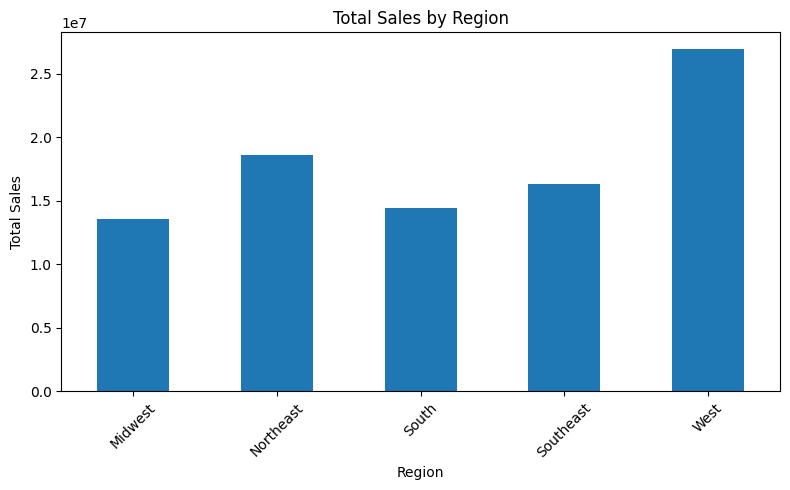

In [13]:
	#3.	How are sales distributed across regions, and which region leads?

# تنظيف عمود Total Sales (إزالة $, , وتحويله إلى float)
df["Total Sales"] = (
    df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)
)

# حساب إجمالي المبيعات حسب المنطقة
sales_by_region = df.groupby("Region")["Total Sales"].sum()

# رسم الرسم البياني
sales_by_region.plot(kind="bar", figsize=(8,5))

plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [15]:
	#4.	Which states achieve the highest sales?

# تنظيف عمود Total Sales
df["Total Sales"] = df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)

# حساب إجمالي المبيعات لكل ولاية وأخذ الأعلى فقط
top_state = df.groupby("State")["Total Sales"].sum().idxmax()
top_state_sales = df.groupby("State")["Total Sales"].sum().max()

print("Highest state achive sales:", top_state)
print("Total sales:", top_state_sales)


Highest state achive sales: New York
Total sales: 6422918.0


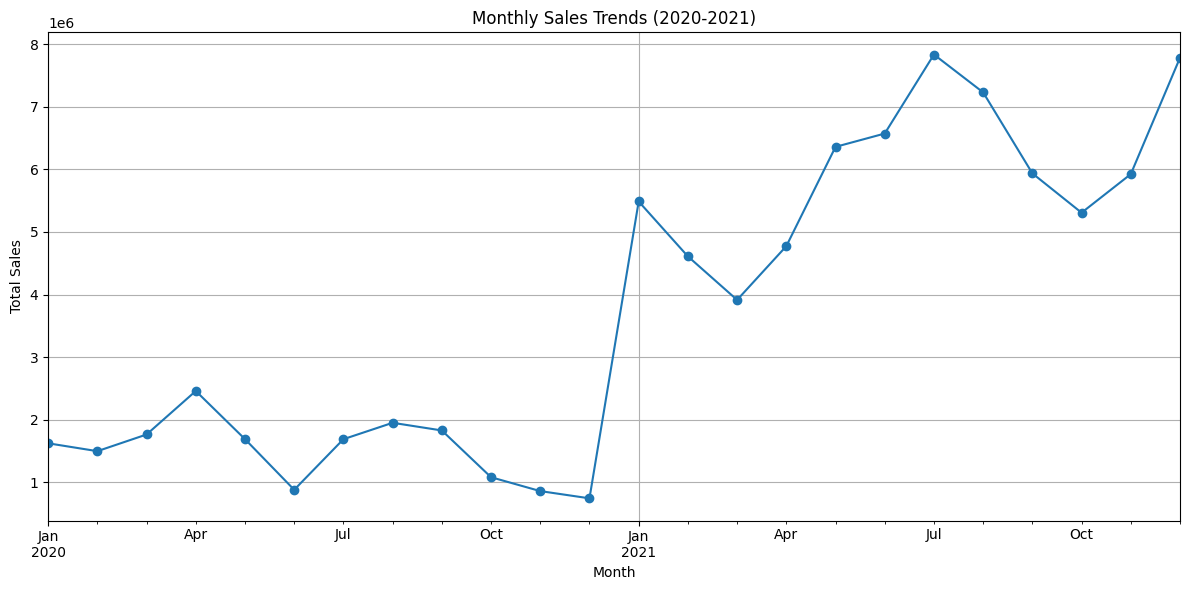

الاتجاه العام عبر الفترة هو: upward (تصاعدي)


In [18]:
	#5.	How do monthly sales trends look across the year?


# توحيد أسماء الأعمدة وإزالة فراغات محتملة
df.columns = df.columns.str.strip()

# تنظيف عمود Total Sales
df["Total Sales"] = df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)

# تحويل عمود التاريخ إلى datetime (مهم جدًا قبل استخدام .dt)
df["Invoice Date"] = pd.to_datetime(df["Invoice Date"], errors="coerce")

# تأكد أنه فعلاً صار datetime
assert pd.api.types.is_datetime64_any_dtype(df["Invoice Date"]), "Invoice Date لم يتحول لتاريخ"

# حساب المبيعات لكل شهر (Period = شهر)
monthly_sales = (
    df.groupby(df["Invoice Date"].dt.to_period("M"))["Total Sales"]
      .sum()
      .sort_index()
)

# رسم الاتجاه الشهري
monthly_sales.plot(kind="line", marker="o", figsize=(12,6))
plt.title("Monthly Sales Trends (2020-2021)")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# تحديد الاتجاه العام (من أول شهر إلى آخر شهر)
trend_direction = "upward (تصاعدي)" if monthly_sales.iloc[-1] > monthly_sales.iloc[0] else "downward (تنازلي)"
print("الاتجاه العام عبر الفترة هو:", trend_direction)

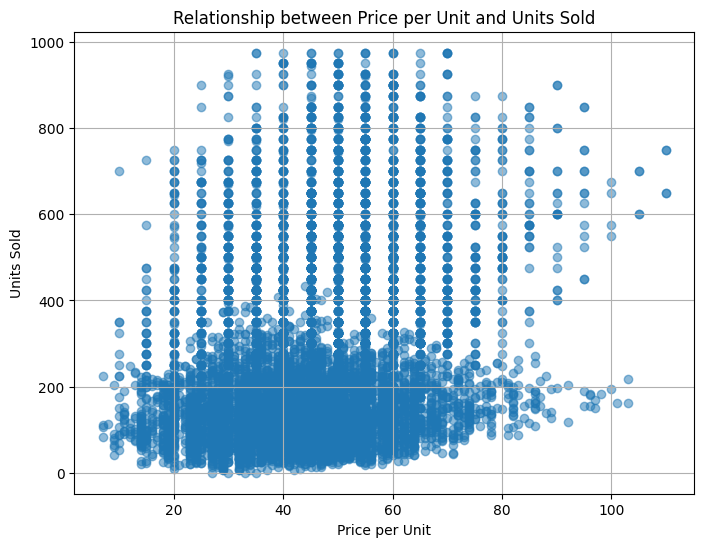

np.float64(0.2618074736750635)

In [19]:
	#6.	What is the relationship between price per unit and units sold?

# تنظيف الأعمدة الرقمية
df["Price per Unit"] = df["Price per Unit"].replace(r"[\$,]", "", regex=True).astype(float)
df["Units Sold"] = pd.to_numeric(df["Units Sold"], errors="coerce")

# رسم العلاقة بين Price per Unit و Units Sold
plt.figure(figsize=(8,6))
plt.scatter(df["Price per Unit"], df["Units Sold"], alpha=0.5)
plt.title("Relationship between Price per Unit and Units Sold")
plt.xlabel("Price per Unit")
plt.ylabel("Units Sold")
plt.grid(True)
plt.show()

# حساب معامل الارتباط
correlation = df["Price per Unit"].corr(df["Units Sold"])
correlation


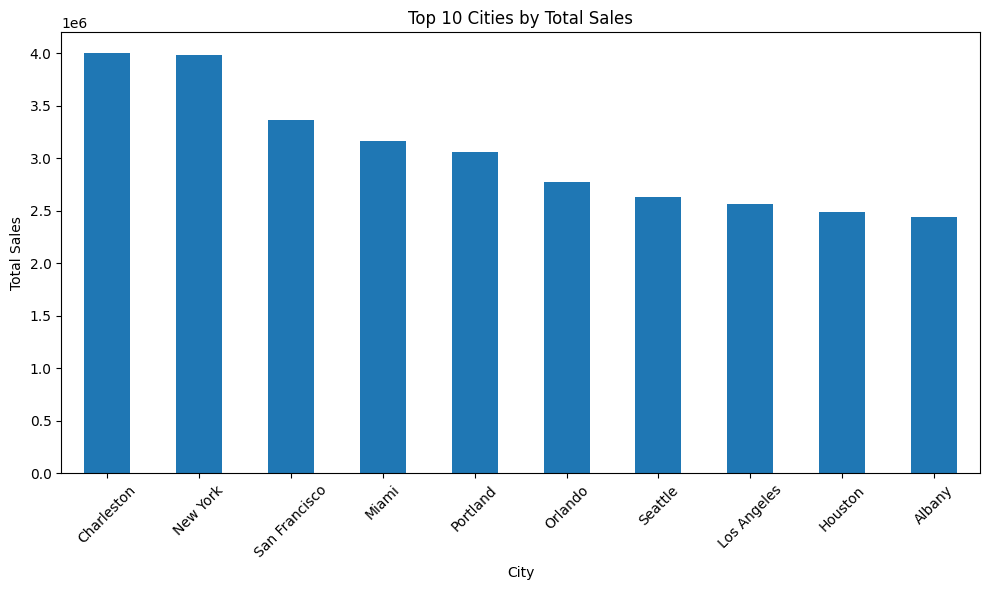

In [22]:
	#7.	Which cities generate the highest sales?

# تنظيف عمود Total Sales
df["Total Sales"] = df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)

# حساب أعلى 10 مدن حسب المبيعات
sales_by_city = (
    df.groupby("City")["Total Sales"]
      .sum()
      .sort_values(ascending=False)
      .head(10)
)

# رسم أعلى 10 مدن
sales_by_city.plot(kind="bar", figsize=(10,6))

plt.title("Top 10 Cities by Total Sales")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
	#8.	What percentage of sales comes from each sales method?

# تنظيف عمود Total Sales
df["Total Sales"] = df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)

# حساب النسبة المئوية للمبيعات لكل طريقة بيع
sales_by_method = (
    df.groupby("Sales Method")["Total Sales"]
      .sum()
)

percentages = (sales_by_method / sales_by_method.sum() * 100).round(2)

percentages

Sales Method
In-store    39.71
Online      27.57
Outlet      32.72
Name: Total Sales, dtype: float64

In [24]:
	#9.Which products have the highest profit margin (Operating Profit ÷ Total Sales)?

# تنظيف الأعمدة الرقمية
df["Total Sales"] = df["Total Sales"].replace(r"[\$,]", "", regex=True).astype(float)
df["Operating Profit"] = df["Operating Profit"].replace(r"[\$,]", "", regex=True).astype(float)

# حساب هامش الربح (Operating Profit ÷ Total Sales)
df["Profit Margin"] = df["Operating Profit"] / df["Total Sales"]

# حساب متوسط هامش الربح لكل منتج
profit_margin_by_product = (
    df.groupby("Product")["Profit Margin"]
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

profit_margin_by_product

Product
Men's Street Footwear        0.446122
Women's Apparel              0.441480
Women's Athletic Footwear    0.424237
Men's Apparel                0.413082
Women's Street Footwear      0.410287
Men's Athletic Footwear      0.402750
Name: Profit Margin, dtype: float64

In [25]:
df.isna().sum()

Retailer             0
Retailer ID          0
Invoice Date         0
Region               0
State                0
City                 0
Product              0
Price per Unit       2
Units Sold          53
Total Sales          0
Operating Profit     0
Sales Method         0
Profit Margin        4
dtype: int64

In [ ]:
df = df.dropna(subset=["Price per Unit", "Units Sold"])

In [ ]:
df["Price per Unit"].fillna(df["Price per Unit"].mean(), inplace=True)
df["Units Sold"].fillna(df["Units Sold"].mean(), inplace=True)

In [26]:
df["Price per Unit"].fillna(df["Price per Unit"].mean(), inplace=True)

/var/folders/c9/w3_8b3ms207f60lsbks2863w0000gn/T/ipykernel_69856/3770718613.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Price per Unit"].fillna(df["Price per Unit"].mean(), inplace=True)


In [110]:
# حذف التكرارات
df = df.drop_duplicates()

# تحويل الأنواع للأعمدة الرقمية
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors='coerce')
df['Units Sold'] = pd.to_numeric(df['Units Sold'], errors='coerce')
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors='coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors='coerce')

# معالجة القيم المفقودة
df = df.dropna(subset=['Product','Price per Unit','Units Sold'])

# إذا حابب تحسب Total Sales بنفسك للتأكد
df['Total Sales Check'] = df['Price per Unit'] * df['Units Sold']

In [111]:
df.describe(include='all').T   # إحصاءات وصفية
df.isna().sum().sort_values(ascending=False) #القيم المفقودة

Retailer             0
Retailer ID          0
Invoice Date         0
Region               0
State                0
City                 0
Product              0
Price per Unit       0
Units Sold           0
Total Sales          0
Operating Profit     0
Sales Method         0
Total Sales Check    0
dtype: int64

In [112]:

# 3) تحويل أعمدة رقمية لنوع عددي (إن لزم)
for col in ['price','sales','quantity','total']:   # عدّل الأسماء بحسب ملفك
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [113]:

# 4) ملء القيم المفقودة أو حذفها
print("Missing before:\n", df.isna().sum().loc[lambda s: s>0])

Missing before:
 Series([], dtype: int64)


In [114]:

# مثال: ملء السعر بالمتوسط إن كان مفقود
if 'price' in df.columns:
    df['price'].fillna(df['price'].median(), inplace=True)



In [115]:
# Cell 6 - Q1: أي منتج يحقق أعلى إجمالي مبيعات؟
if 'product' in df.columns and 'total' in df.columns:
    q1 = df.groupby('product')['total'].sum().sort_values(ascending=False).head(10)
    print(q1)

# Q2: متوسط المبيعات (total) لكل فئة سعرية
if 'price_cat' in df.columns:
    q2 = df.groupby('price_cat')['total'].mean()
    print(q2)

# Q3: أكثر 10 عملاء شراءً (حسب total)
if 'customer_id' in df.columns:
    q3 = df.groupby('customer_id')['total'].sum().sort_values(ascending=False).head(10)
    print(q3)

# Q4: توزيع المبيعات (histogram)
if 'total' in df.columns:
    print(df['total'].describe())

# Q5: علاقة بين السعر والكمية
if set(['price','quantity']).issubset(df.columns):
    corr = df[['price','quantity','total']].corr()
    print("Correlation matrix:\n", corr)

/Users/omaralharbi/Desktop/Projects/Quest2/venv2/lib/python3.11/site-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/omaralharbi/Desktop/Projects/Quest2/venv2/lib/python3.11/site-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


<Figure size 1000x500 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Figure size 800x600 with 0 Axes>

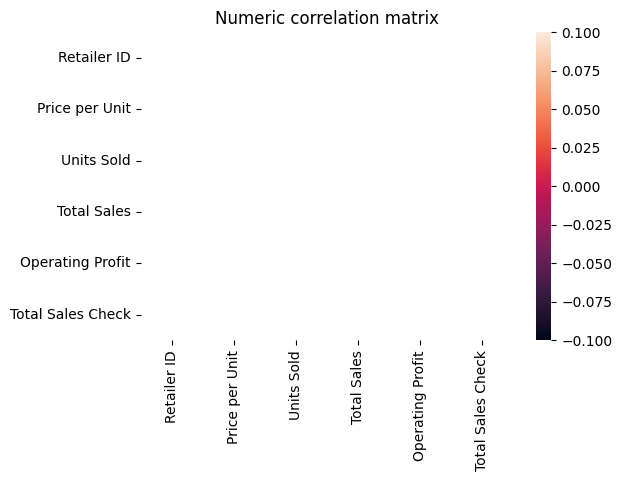

In [116]:
# Cell 7 - Visualization examples

plt.figure(figsize=(10,5))
if 'product' in df.columns and 'total' in df.columns:
    sns.barplot(x=q1.index, y=q1.values)
    plt.xticks(rotation=45)
    plt.title("Top products by total sales")
    plt.show()

# Histogram of total
plt.figure(figsize=(8,4))
if 'total' in df.columns:
    sns.histplot(df['total'], bins=30, kde=True)
    plt.title("Distribution of total sales")
    plt.show()

# Scatter price vs quantity
plt.figure(figsize=(8,6))
if set(['price','quantity']).issubset(df.columns):
    sns.scatterplot(data=df, x='price', y='quantity', alpha=0.6)
    plt.title("Price vs Quantity")
    plt.show()

# Heatmap of correlations
plt.figure(figsize=(6,4))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt=".2f")
plt.title("Numeric correlation matrix")
plt.show()

In [117]:
print(df["Product"].value_counts().head(1))


Series([], Name: count, dtype: int64)


Series([], Name: Total Sales, dtype: float64)


IndexError: index 0 is out of bounds for axis 0 with size 0

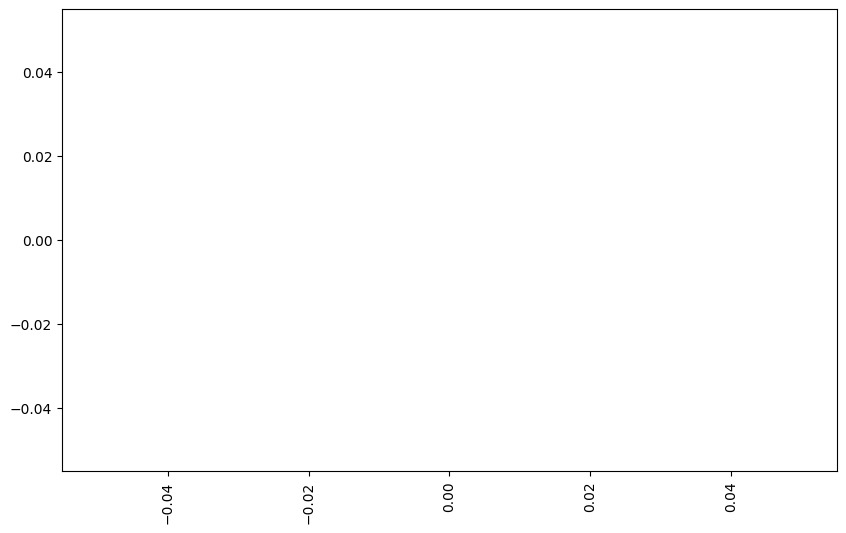

In [118]:

# Group by Product and calculate total sales
product_sales = df.groupby("Product")["Total Sales"].sum().sort_values(ascending=False).head(10)

# Display the result
print(product_sales)

# Plot top 10 products
plt.figure(figsize=(10,6))
product_sales.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 Products by Total Sales")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.xticks(rotation=45, ha="right")
plt.show()